<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/Foundation_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [42]:
churn = pd.read_csv('/content/sample_data/churn.csv')

In [43]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [44]:
print(churn.isnull().sum())

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64


In [45]:
churn["Churn?"] = churn["Churn?"].map({'False.': False, 'True.':True})
churn["Int'l Plan"] = churn["Int'l Plan"].map({'no': False, 'yes': True})
churn["VMail plan"] = churn["VMail Plan"].map({'no': False, 'yes': True})


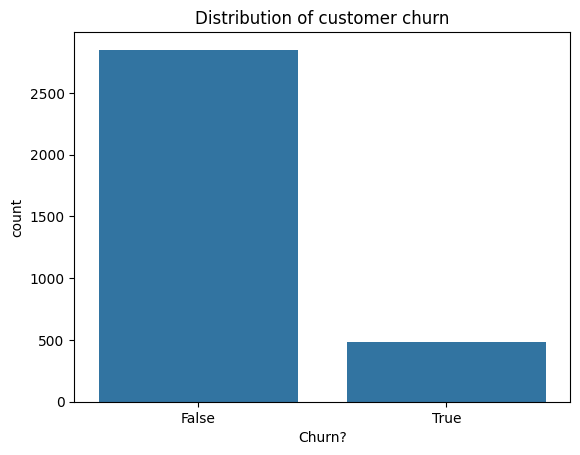

In [46]:
sns.countplot(x='Churn?', data=churn)
plt.title('Distribution of customer churn')
plt.show()

# Calculate the percentage of Churn


In [47]:
churn_percentage = churn['Churn?'].value_counts(normalize=True) * 100
# Print the percentage of customers who churned
print(f"Percentage of customers who churned: {churn_percentage[1]:.2f}%")


Percentage of customers who churned: 14.49%


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


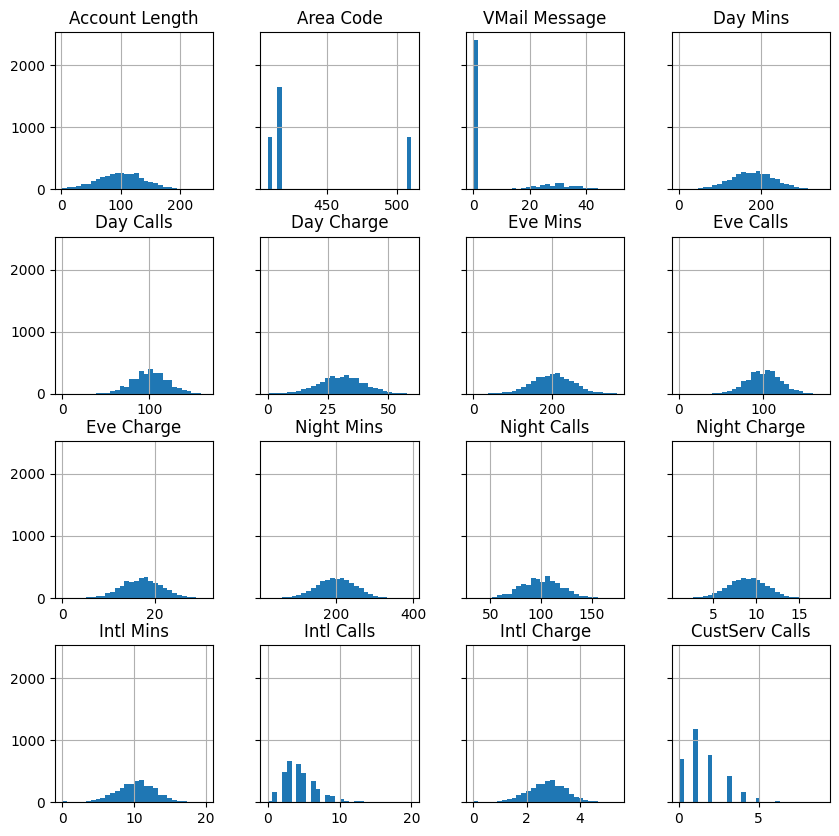

In [48]:
# Histograms for each numeric features, to see how balanced the data is
display (churn.describe())
%matplotlib inline
hist = churn.hist(bins=30, sharey=True, figsize=(10,10))

In [49]:
# Frequency tables for each categorical feature
for column in churn.select_dtypes(include=['object', 'bool']).columns:
  # Using 'display' to show the DataFrame and 'pd.crosstab()' to create the frequency table
  display(column, pd.crosstab(index=churn[column], columns='% observations' , normalize='columns')* 100)

'State'

col_0,% observations
State,
AK,1.560156
AL,2.400240
AR,1.650165
AZ,1.920192
CA,1.020102
CO,1.980198
CT,2.220222
DC,1.620162
DE,1.830183


'Phone'

col_0,% observations
Phone,
327-1058,0.030003
327-1319,0.030003
327-3053,0.030003
327-3587,0.030003
327-3850,0.030003
...,...
422-7728,0.030003
422-8268,0.030003
422-8333,0.030003


"Int'l Plan"

col_0,% observations
Int'l Plan,
False,90.309031
True,9.690969


'VMail Plan'

col_0,% observations
VMail Plan,
no,72.337234
yes,27.662766


'Churn?'

col_0,% observations
Churn?,
False,85.508551
True,14.491449


'VMail plan'

col_0,% observations
VMail plan,
False,72.337234
True,27.662766


# Two options to help visualize the correlation between features and Churn (heatmap and correlation matrix)
# Correlation heatmap of numerical features

#Calculate the correlation matrix, focusing on the Churn column

3. # Building and Traing the Model